In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [351]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [352]:
from sklearn.cross_decomposition import PLSRegression as PLSR

In [353]:
data = pd.read_excel(r"C:\Users\giorg\Desktop\RISEN project\Articles\IMS articles\jupiter notebooks\dataset esplosivi.xlsx", sheet_name='explosivesAl_DNT', index_col=0, header=0)
data.head()

,Class,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
C4_7,C4,0.004,0.006,0.002,0.006,-0.013,-0.005,-0.001,0.001,-0.002,...,-0.002,0.000,0.009,0.008,0.007,0.006,0.003,0.002,-0.002,-0.035
C4_8,C4,-0.002,-0.016,-0.017,0.001,-0.012,-0.009,-0.007,-0.002,0.004,...,-0.008,0.003,0.000,-0.018,-0.006,0.001,-0.008,-0.013,-0.011,-0.035
C4_9,C4,-0.001,0.002,0.002,0.002,0.002,0.003,-0.003,-0.001,-0.002,...,-0.004,0.000,0.000,0.002,-0.004,0.005,0.001,-0.004,-0.004,-0.035
C4_10,C4,-0.011,0.000,-0.005,0.002,-0.025,-0.005,-0.010,-0.011,0.003,...,-0.011,-0.006,-0.015,-0.007,-0.021,-0.012,-0.008,-0.003,-0.015,-0.044
C4_11,C4,-0.007,-0.009,-0.016,-0.008,-0.005,-0.009,-0.009,0.004,-0.007,...,0.011,-0.002,-0.023,-0.011,0.013,-0.023,0.019,-0.024,-0.010,-0.035


In [354]:
data

,Class,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
C4_7,C4,0.004,0.006,0.002,0.006,-0.013,-0.005,-0.001,0.001,-0.002,...,-0.002,0.000,0.009,0.008,0.007,0.006,0.003,0.002,-0.002,-0.035
C4_8,C4,-0.002,-0.016,-0.017,0.001,-0.012,-0.009,-0.007,-0.002,0.004,...,-0.008,0.003,0.000,-0.018,-0.006,0.001,-0.008,-0.013,-0.011,-0.035
C4_9,C4,-0.001,0.002,0.002,0.002,0.002,0.003,-0.003,-0.001,-0.002,...,-0.004,0.000,0.000,0.002,-0.004,0.005,0.001,-0.004,-0.004,-0.035
C4_10,C4,-0.011,0.000,-0.005,0.002,-0.025,-0.005,-0.010,-0.011,0.003,...,-0.011,-0.006,-0.015,-0.007,-0.021,-0.012,-0.008,-0.003,-0.015,-0.044
C4_11,C4,-0.007,-0.009,-0.016,-0.008,-0.005,-0.009,-0.009,0.004,-0.007,...,0.011,-0.002,-0.023,-0.011,0.013,-0.023,0.019,-0.024,-0.010,-0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,4DNT_8","3,4DNT",-0.013,-0.001,-0.011,0.005,-0.013,-0.011,-0.007,0.000,-0.013,...,-0.009,-0.003,-0.008,0.005,-0.023,-0.001,-0.016,-0.011,-0.009,-0.035
"3,4DNT_9","3,4DNT",-0.007,-0.019,0.005,0.007,-0.008,-0.002,-0.007,-0.003,-0.002,...,-0.011,-0.009,0.004,0.004,-0.015,-0.014,0.001,-0.015,-0.018,-0.035
"3,4DNT_10","3,4DNT",-0.033,-0.001,-0.026,0.005,-0.027,-0.004,-0.016,-0.010,-0.012,...,-0.029,-0.012,-0.002,-0.011,-0.018,-0.003,-0.022,-0.008,-0.005,-0.035


In [355]:
# Checking the presence missing values
data.isnull().sum()

Class    0
0.52     0
0.54     0
0.56     0
0.58     0
        ..
13.78    0
13.8     0
13.82    0
13.84    0
13.86    0
Length: 669, dtype: int64

In [356]:
# It is necessary to convert the column names as string to select them
data.columns = data.columns.astype(str) # to make the colnames as text

In [357]:
# select only numerical attributes
X = data.iloc[:, 1:]
X

,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
C4_7,0.004,0.006,0.002,0.006,-0.013,-0.005,-0.001,0.001,-0.002,0.002,...,-0.002,0.000,0.009,0.008,0.007,0.006,0.003,0.002,-0.002,-0.035
C4_8,-0.002,-0.016,-0.017,0.001,-0.012,-0.009,-0.007,-0.002,0.004,-0.019,...,-0.008,0.003,0.000,-0.018,-0.006,0.001,-0.008,-0.013,-0.011,-0.035
C4_9,-0.001,0.002,0.002,0.002,0.002,0.003,-0.003,-0.001,-0.002,-0.001,...,-0.004,0.000,0.000,0.002,-0.004,0.005,0.001,-0.004,-0.004,-0.035
C4_10,-0.011,0.000,-0.005,0.002,-0.025,-0.005,-0.010,-0.011,0.003,-0.015,...,-0.011,-0.006,-0.015,-0.007,-0.021,-0.012,-0.008,-0.003,-0.015,-0.044
C4_11,-0.007,-0.009,-0.016,-0.008,-0.005,-0.009,-0.009,0.004,-0.007,-0.011,...,0.011,-0.002,-0.023,-0.011,0.013,-0.023,0.019,-0.024,-0.010,-0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,4DNT_8",-0.013,-0.001,-0.011,0.005,-0.013,-0.011,-0.007,0.000,-0.013,-0.010,...,-0.009,-0.003,-0.008,0.005,-0.023,-0.001,-0.016,-0.011,-0.009,-0.035
"3,4DNT_9",-0.007,-0.019,0.005,0.007,-0.008,-0.002,-0.007,-0.003,-0.002,-0.008,...,-0.011,-0.009,0.004,0.004,-0.015,-0.014,0.001,-0.015,-0.018,-0.035
"3,4DNT_10",-0.033,-0.001,-0.026,0.005,-0.027,-0.004,-0.016,-0.010,-0.012,-0.008,...,-0.029,-0.012,-0.002,-0.011,-0.018,-0.003,-0.022,-0.008,-0.005,-0.035


In [358]:
y = data.Class
y

Sample_id
C4_7             C4
C4_8             C4
C4_9             C4
C4_10            C4
C4_11            C4
              ...  
3,4DNT_8     3,4DNT
3,4DNT_9     3,4DNT
3,4DNT_10    3,4DNT
3,4DNT_11    3,4DNT
3,4DNT_12    3,4DNT
Name: Class, Length: 66, dtype: object

In [359]:
# Prepare the driftimes vector
wl = np.arange(0.52,13.87,0.02) #wavelengths
wl

array([ 0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,
        0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,
        0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,  1.04,
        1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,  1.2 ,  1.22,
        1.24,  1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,  1.4 ,
        1.42,  1.44,  1.46,  1.48,  1.5 ,  1.52,  1.54,  1.56,  1.58,
        1.6 ,  1.62,  1.64,  1.66,  1.68,  1.7 ,  1.72,  1.74,  1.76,
        1.78,  1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,
        1.96,  1.98,  2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,
        2.14,  2.16,  2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,
        2.32,  2.34,  2.36,  2.38,  2.4 ,  2.42,  2.44,  2.46,  2.48,
        2.5 ,  2.52,  2.54,  2.56,  2.58,  2.6 ,  2.62,  2.64,  2.66,
        2.68,  2.7 ,  2.72,  2.74,  2.76,  2.78,  2.8 ,  2.82,  2.84,
        2.86,  2.88,  2.9 ,  2.92,  2.94,  2.96,  2.98,  3.  ,  3.02,
        3.04,  3.06,

In [360]:
# autoscale the data
from sklearn.preprocessing import scale
X_autosc = scale(X.values)
X_autosc

array([[ 1.22270236,  1.21466367,  0.77170685, ...,  1.29396586,
         0.72213678,  0.60254273],
       [ 0.70650818, -1.1849168 , -0.89104296, ..., -0.30332367,
         0.08095704,  0.60254273],
       [ 0.79254055,  0.77837631,  0.77170685, ...,  0.65505005,
         0.57965239,  0.60254273],
       ...,
       [-1.96049504,  0.45116079, -1.67866128, ...,  0.22910618,
         0.5084102 ,  0.60254273],
       [-2.30462449, -0.20327025,  0.24662796, ...,  0.65505005,
        -0.34649612,  0.60254273],
       [-1.10017142,  0.12394527, -0.9785561 , ...,  0.97450796,
         0.79337897, -1.95012142]])

In [361]:
# Write the SNV function (is, actually, like autoscaling by row)
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [362]:
# Compute the SNV on np data
Xsnv = snv(X.values)
Xsnv

array([[0.314171  , 0.3181969 , 0.3101451 , ..., 0.3101451 , 0.3020933 ,
        0.23566592],
       [0.30214074, 0.27551459, 0.27361272, ..., 0.28122019, 0.28502393,
        0.2393791 ],
       [0.32295738, 0.32955131, 0.32955131, ..., 0.31636346, 0.31636346,
        0.24822627],
       ...,
       [0.27409114, 0.34237275, 0.28902774, ..., 0.32743615, 0.33383755,
        0.26982354],
       [0.26343381, 0.32732746, 0.33371683, ..., 0.33371683, 0.30602958,
        0.26769338],
       [0.31795775, 0.3620695 , 0.32956611, ..., 0.36903452, 0.36903452,
        0.24598594]])

In [363]:
# Preprocessing with Savitzki-Golay - smoothing, defining the window, the order and the use of derivatives
from scipy.signal import savgol_filter
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_savgol

array([[ 0.0035258 ,  0.00729732,  0.00326602, ...,  0.00363492,
        -0.00512126, -0.03398163],
       [-0.00340485, -0.01288008, -0.01368242, ..., -0.0080273 ,
        -0.0139806 , -0.03447998],
       [-0.00087183,  0.00147802,  0.00246814, ...,  0.00043911,
        -0.00802621, -0.03394045],
       ...,
       [-0.0320612 , -0.00793612, -0.00855693, ..., -0.00765564,
        -0.01025397, -0.03315893],
       [-0.03773261, -0.00439082, -0.00530765, ..., -0.00911011,
        -0.01387626, -0.03559051],
       [-0.02093096, -0.01189721, -0.00961793, ...,  0.00292824,
        -0.00549948, -0.05267595]])

In [364]:
# We can also combine the preprocessing strategies together: Savitzki-Golay - smoothing + SNV
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_snv_savgol = snv(X_savgol)
X_snv_savgol

array([[0.31327982, 0.32087317, 0.3127568 , ..., 0.31349952, 0.29587033,
        0.23776455],
       [0.29956395, 0.28153724, 0.2800108 , ..., 0.2907697 , 0.2794435 ,
        0.24044326],
       [0.32332686, 0.32849312, 0.33066995, ..., 0.32620903, 0.30759756,
        0.25062371],
       ...,
       [0.27626471, 0.32777429, 0.32644879, ..., 0.32837315, 0.32282543,
        0.27392094],
       [0.26203786, 0.33309342, 0.33113952, ..., 0.32303601, 0.31287873,
        0.26660295],
       [0.32298816, 0.3439758 , 0.34927114, ..., 0.37841902, 0.35883933,
        0.24923662]])

In [365]:
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_autosc_savgol = scale(X_savgol)
X_autosc_savgol

array([[ 1.16973568,  1.70110207,  1.48312181, ...,  1.2903578 ,
         0.95957946,  0.66844152],
       [ 0.57328926, -0.90245521, -1.40407529, ...,  0.02819586,
         0.05218323,  0.59884019],
       [ 0.79127933,  0.95021857,  1.3472001 , ...,  0.94448647,
         0.66204669,  0.67419239],
       ...,
       [-1.8928539 , -0.26451916, -0.53094021, ...,  0.06841933,
         0.43387374,  0.78334353],
       [-2.38093141,  0.19294332,  0.02258072, ..., -0.08899243,
         0.06286943,  0.44373977],
       [-0.93499423, -0.77563235, -0.71168323, ...,  1.21387581,
         0.92084069, -1.9424804 ]])

In [366]:
y = y.astype('category')
y

Sample_id
C4_7             C4
C4_8             C4
C4_9             C4
C4_10            C4
C4_11            C4
              ...  
3,4DNT_8     3,4DNT
3,4DNT_9     3,4DNT
3,4DNT_10    3,4DNT
3,4DNT_11    3,4DNT
3,4DNT_12    3,4DNT
Name: Class, Length: 66, dtype: category
Categories (8, object): ['2,4DNT', '2,6DNT', '3,4DNT', 'C4', 'PETN', 'RDX', 'SEMTEX', 'TNT']

In [367]:
Y = y.cat.codes
Y

Sample_id
C4_7         3
C4_8         3
C4_9         3
C4_10        3
C4_11        3
            ..
3,4DNT_8     2
3,4DNT_9     2
3,4DNT_10    2
3,4DNT_11    2
3,4DNT_12    2
Length: 66, dtype: int8

In [368]:
Y

Sample_id
C4_7         3
C4_8         3
C4_9         3
C4_10        3
C4_11        3
            ..
3,4DNT_8     2
3,4DNT_9     2
3,4DNT_10    2
3,4DNT_11    2
3,4DNT_12    2
Length: 66, dtype: int8

In [369]:
regr_pls = PLSR(n_components=3)
PLS_scores=regr_pls.fit_transform(X,Y)
print(regr_pls.x_scores_)

[[  9.7996658    4.39041876   2.39678749]
 [  6.3844776    1.096894     1.59641766]
 [  9.43888349   4.63227816   1.03423787]
 [  3.14038911   0.34783601  -0.58725617]
 [  2.66333823   2.36914705  -0.74698171]
 [  6.41497257   1.59749565   1.25489424]
 [ 14.1462744    4.50234811   3.26911113]
 [ 13.97518233   4.7319011    1.13870165]
 [  7.54564404   2.7428899   -0.25092637]
 [ 15.86467494   4.4594376    3.22437922]
 [  9.11097882   2.55397947   0.64992241]
 [  8.7973428    3.7148998   -0.45144789]
 [  7.42926146  -0.1886872   -3.77072121]
 [  2.24199679  -0.42564108  -7.4359886 ]
 [ 10.89943305   3.07498225   1.38307922]
 [ 10.67002897   3.7460676    1.10412978]
 [  9.73535931   4.68691725   0.36691449]
 [ 12.26805387   4.36540129   2.00811342]
 [ 15.20564974   2.24016387   0.12391307]
 [ 15.39607491   1.98473861   0.97422018]
 [ 16.99666505   1.86981278   0.69610802]
 [ 17.52240987   2.50347707  -0.03913008]
 [ 17.17868503   0.60708945  -1.42896392]
 [  8.80003122  -3.96954059  -6.12

In [370]:
scores = regr_pls.x_scores_
scores

array([[  9.7996658 ,   4.39041876,   2.39678749],
       [  6.3844776 ,   1.096894  ,   1.59641766],
       [  9.43888349,   4.63227816,   1.03423787],
       [  3.14038911,   0.34783601,  -0.58725617],
       [  2.66333823,   2.36914705,  -0.74698171],
       [  6.41497257,   1.59749565,   1.25489424],
       [ 14.1462744 ,   4.50234811,   3.26911113],
       [ 13.97518233,   4.7319011 ,   1.13870165],
       [  7.54564404,   2.7428899 ,  -0.25092637],
       [ 15.86467494,   4.4594376 ,   3.22437922],
       [  9.11097882,   2.55397947,   0.64992241],
       [  8.7973428 ,   3.7148998 ,  -0.45144789],
       [  7.42926146,  -0.1886872 ,  -3.77072121],
       [  2.24199679,  -0.42564108,  -7.4359886 ],
       [ 10.89943305,   3.07498225,   1.38307922],
       [ 10.67002897,   3.7460676 ,   1.10412978],
       [  9.73535931,   4.68691725,   0.36691449],
       [ 12.26805387,   4.36540129,   2.00811342],
       [ 15.20564974,   2.24016387,   0.12391307],
       [ 15.39607491,   1.98473

In [371]:
scores = pd.DataFrame(scores, columns = ['LV1','LV2','LV3'])
scores.index = data.index
y = data.Class
scores = pd.concat([scores, y], axis = 1)
scores

,LV1,LV2,LV3,Class
Sample_id,,,,
C4_7,9.799666,4.390419,2.396787,C4
C4_8,6.384478,1.096894,1.596418,C4
C4_9,9.438883,4.632278,1.034238,C4
C4_10,3.140389,0.347836,-0.587256,C4
C4_11,2.663338,2.369147,-0.746982,C4
...,...,...,...,...
"3,4DNT_8",-4.023106,-3.696777,10.233094,"3,4DNT"
"3,4DNT_9",-4.902773,-3.343635,10.729222,"3,4DNT"
"3,4DNT_10",-6.124851,-6.430040,9.281647,"3,4DNT"


In [372]:
loadings = pd.DataFrame(regr_pls.x_loadings_,columns = ["LV1",'LV2','LV3'])
loadings["Attributes"] = data.iloc[:,1:].columns
loadings

,LV1,LV2,LV3,Attributes
0,0.037955,0.055442,0.006501,0.52
1,0.033557,-0.005344,0.028834,0.54
2,0.029812,0.015121,0.018844,0.56
3,0.032100,0.016739,-0.013066,0.58
4,0.018213,0.018679,0.010080,0.6
...,...,...,...,...
663,0.003521,0.002331,0.021921,13.78
664,-0.025904,0.008485,0.003391,13.8
665,0.015432,0.005055,0.009325,13.82
666,-0.018568,-0.006259,0.018270,13.84


In [373]:
import plotly.express as px
fig = px.scatter(scores, x="LV1", y="LV2", color="Class", hover_data=['Class'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [374]:
import plotly.express as px
fig = px.scatter(scores, x="LV2", y="LV3", color="Class", hover_data=['Class'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [375]:
# Plot 3D scores
fig = px.scatter_3d(scores, x='LV1', y='LV2', z='LV3',
                    color='Class', hover_data=['Class'], hover_name=scores.index)
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    title_text='Scores 3D Plot colored by Class using the raw data')
fig.show()


In [376]:
# Loadings plot
fig = px.scatter(loadings, x="LV1", y="LV2",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

In [377]:
pred=regr_pls.predict(X)
pred

array([ 3.80773858,  3.77588933,  3.79724562,  3.4293155 ,  2.98433539,
        3.71868079,  4.58993436,  4.67874409,  3.85580212,  4.94478868,
        4.13332846,  3.94761094,  4.62851148,  3.91571454,  4.34131251,
        4.19677584,  3.89817807,  4.33590475,  5.44913046,  5.46743954,
        5.82960084,  5.87796621,  6.25578401,  5.76119554,  8.0115404 ,
        6.16432567,  5.55871486,  6.69095217,  8.13999188,  7.02662344,
        1.51317474,  0.76719839,  0.82710252,  1.22550413,  1.22164212,
        0.85846999,  0.96892064,  1.63064311,  1.33260192,  1.14501012,
        1.44559965,  1.19126297,  0.39019048,  0.24185536,  0.3404087 ,
        0.1154014 ,  0.2185576 ,  0.27487388, -0.37444026, -0.22120145,
        0.15050457,  0.02912662, -0.24446246, -0.3546117 ,  1.90341569,
        1.93028409,  1.84434408,  1.75768783,  2.01362848,  1.61364312,
        1.66100944,  1.88689906,  1.60949921,  2.02911266,  1.98430685,
        1.85976035])

In [378]:
pred= np.abs(np.around(pred, decimals= 0))
pred

array([4., 4., 4., 3., 3., 4., 5., 5., 4., 5., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 5., 6., 6., 6., 6., 8., 6., 6., 7., 8., 7., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [379]:
print(y)

Sample_id
C4_7             C4
C4_8             C4
C4_9             C4
C4_10            C4
C4_11            C4
              ...  
3,4DNT_8     3,4DNT
3,4DNT_9     3,4DNT
3,4DNT_10    3,4DNT
3,4DNT_11    3,4DNT
3,4DNT_12    3,4DNT
Name: Class, Length: 66, dtype: object


In [380]:
print(confusion_matrix(pred, Y))
print(classification_report(Y, pred, digits=2))

[[12  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  2 12  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  4  3  5  0  0  0]
 [ 0  0  0  0  3  1  2  0  0]
 [ 0  0  0  0  0  0  4  2  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  2  0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.83      0.91        12
         2.0       0.86      1.00      0.92        12
         3.0       1.00      0.33      0.50         6
         4.0       0.25      0.50      0.33         6
         5.0       0.17      0.17      0.17         6
         6.0       0.67      0.67      0.67         6
         7.0       1.00      0.33      0.50         6
         8.0       0.00      0.00      0.00         0

    accuracy                           0.70        66
   macro avg       0.66      0.54      0.56        66
weighted avg       0.80      0.70      0.71        66



c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



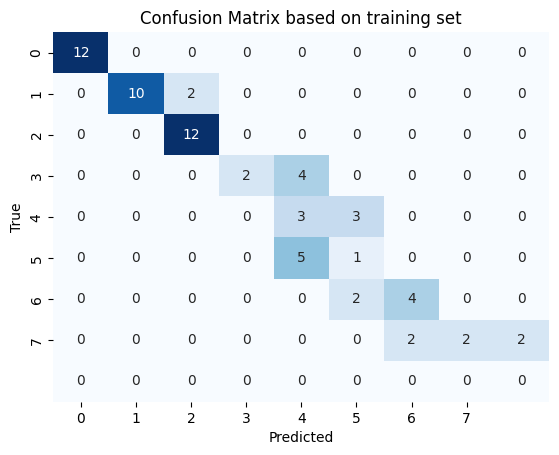

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.83      0.91        12
         2.0       0.86      1.00      0.92        12
         3.0       1.00      0.33      0.50         6
         4.0       0.25      0.50      0.33         6
         5.0       0.17      0.17      0.17         6
         6.0       0.67      0.67      0.67         6
         7.0       1.00      0.33      0.50         6
         8.0       0.00      0.00      0.00         0

    accuracy                           0.70        66
   macro avg       0.66      0.54      0.56        66
weighted avg       0.80      0.70      0.71        66



c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [381]:
# Assuming 'y_true' and 'y_pred' are your true and predicted labels
cm = confusion_matrix(Y, pred)

# Get unique class labels from y_true
class_labels = sorted(set(Y))

# Plot the confusion matrix using seaborn with custom colormap (Blues)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False, vmin=0, vmax=cm.max())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix based on training set')
plt.show()

# Print the classification report
print(classification_report(Y, pred, digits=2))

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X_autosc_savgol, Y, train_size=0.7, shuffle=True, stratify=Y)

In [383]:
regr_pls = PLSR(n_components=3)
PLS_scores=regr_pls.fit_transform(X_train,y_train)
print(regr_pls.x_scores_)

[[-15.01708406   1.96150236   3.1513901 ]
 [ 23.79561909   5.00306239  -3.8945415 ]
 [ -7.37941693  -2.07026162  -8.100175  ]
 [ -6.7519688    7.80601957   5.96309894]
 [  4.86890267 -15.11861827  14.87460816]
 [ -9.57062721   5.13808938  -2.14468543]
 [ -4.76985697  -1.3334932   -4.82482667]
 [ 25.89721069  -4.63562527 -10.9024638 ]
 [ 21.30638589   3.72227386  -5.15524423]
 [ 16.96904432   9.10593161   5.94106707]
 [ 22.68850875  -1.18351737  -9.09872048]
 [  2.2895609   -0.07665192   3.56476941]
 [  8.59148906  -2.64157283  -3.90679705]
 [  1.01642157 -22.22621063   9.42276213]
 [ 18.27623226   8.15154358   7.65295657]
 [-11.21595317   3.85266215   6.12977257]
 [ -5.97610313  -3.26912738  -5.7334771 ]
 [  1.9247228   10.90276298   5.91046467]
 [-22.5620519   -0.44756625  -3.84606806]
 [  2.27439218  -1.95962783   4.80755756]
 [ -8.53398296   4.3813954    4.4627283 ]
 [ -8.68997811  -2.25995824  -4.10124848]
 [-10.04008034   2.36758855   3.49199595]
 [ -9.26690407   7.67715174  -0.93

In [384]:
pred=regr_pls.predict(X_test)
pred

array([3.85874986, 1.65713711, 0.24401186, 0.93218742, 1.74102084,
       5.08214825, 0.88182282, 4.63469404, 0.79595336, 4.30688653,
       5.54992738, 4.44217305, 6.4554149 , 3.7672045 , 3.7871888 ,
       2.25977465, 0.87099591, 4.52804986, 0.6679828 , 1.26989411])

In [385]:
pred= np.abs(np.around(pred, decimals= 0))
pred

array([4., 2., 0., 1., 2., 5., 1., 5., 1., 4., 6., 4., 6., 4., 4., 2., 1.,
       5., 1., 1.])

In [386]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=2))

[[1 0 0 0 0 0 0 0]
 [2 4 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.20      0.50      0.29         2
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         2

    accuracy                           0.50        20
   macro avg       0.42      0.42      0.39        20
weighted avg       0.50      0.50      0.46        20



c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



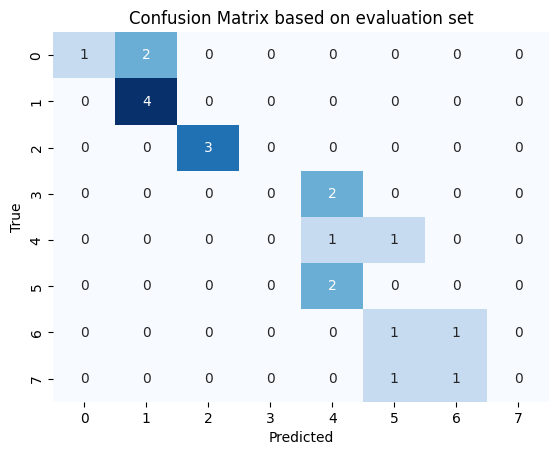

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.20      0.50      0.29         2
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         2

    accuracy                           0.50        20
   macro avg       0.42      0.42      0.39        20
weighted avg       0.50      0.50      0.46        20



c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\giorg\Desktop\RISEN project\IMS\chemometrics\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [387]:
# Assuming 'y_true' and 'y_pred' are your true and predicted labels
cm = confusion_matrix(y_test, pred)

# Get unique class labels from y_true
class_labels = sorted(set(y_test))

# Plot the confusion matrix using seaborn with custom colormap (Blues)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False, vmin=0, vmax=cm.max())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix based on evaluation set')
plt.show()

# Print the classification report
print(classification_report(y_test, pred, digits=2))